## Setup

In [69]:
# Importing frameworks
import os
from dotenv import load_dotenv
import pandas as pd
import matplotlib.pyplot as plt
import sweetviz as sv
import missingno

In [70]:
# Reading environment variable for data path
load_dotenv()

DATA_PATH = os.environ['DATA_PATH']

In [71]:
# Reading original tables
df_customers = pd.read_csv(f'{DATA_PATH}/tables/olist_customers_dataset.csv')
df_geoloc = pd.read_csv(f'{DATA_PATH}/tables/olist_geolocation_dataset.csv')
df_items = pd.read_csv(f'{DATA_PATH}/tables/olist_order_items_dataset.csv')
df_payments = pd.read_csv(f'{DATA_PATH}/tables/olist_order_payments_dataset.csv')
df_reviews = pd.read_csv(f'{DATA_PATH}/tables/olist_order_reviews_dataset.csv')
df_orders = pd.read_csv(f'{DATA_PATH}/tables/olist_orders_dataset.csv')
df_products = pd.read_csv(f'{DATA_PATH}/tables/olist_products_dataset.csv')
df_sellers = pd.read_csv(f'{DATA_PATH}/tables/olist_sellers_dataset.csv')

In [72]:
# Merging all tables
df = pd.merge(df_orders, df_reviews, on='order_id', how='left')
df = pd.merge(df, df_payments, on='order_id', how='left')
df = pd.merge(df, df_items, on='order_id', how='left')
df = pd.merge(df, df_products, on='product_id', how='left')
df = pd.merge(df, df_sellers, on='seller_id', how='left')
df = pd.merge(df, df_customers, on='customer_id', how='left')

df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_id,review_score,...,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,a54f0611adc9ed256b57ede6b6eb5114,4.0,...,19.0,8.0,13.0,9350.0,maua,SP,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,a54f0611adc9ed256b57ede6b6eb5114,4.0,...,19.0,8.0,13.0,9350.0,maua,SP,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,a54f0611adc9ed256b57ede6b6eb5114,4.0,...,19.0,8.0,13.0,9350.0,maua,SP,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,8d5266042046a06655c8db133d120ba5,4.0,...,19.0,13.0,19.0,31570.0,belo horizonte,SP,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,e73b67b67587f7644d5bd1a52deb1b01,5.0,...,24.0,19.0,21.0,14840.0,guariba,SP,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO


## Exploratory Data Analysis

In [73]:
# Verifying merged dataframe dimensions
df.shape

(119143, 39)

In [74]:
# Verifying data types
df.dtypes

order_id                          object
customer_id                       object
order_status                      object
order_purchase_timestamp          object
order_approved_at                 object
order_delivered_carrier_date      object
order_delivered_customer_date     object
order_estimated_delivery_date     object
review_id                         object
review_score                     float64
review_comment_title              object
review_comment_message            object
review_creation_date              object
review_answer_timestamp           object
payment_sequential               float64
payment_type                      object
payment_installments             float64
payment_value                    float64
order_item_id                    float64
product_id                        object
seller_id                         object
shipping_limit_date               object
price                            float64
freight_value                    float64
product_category

                                             |          | [  0%]   00:00 -> (? left)


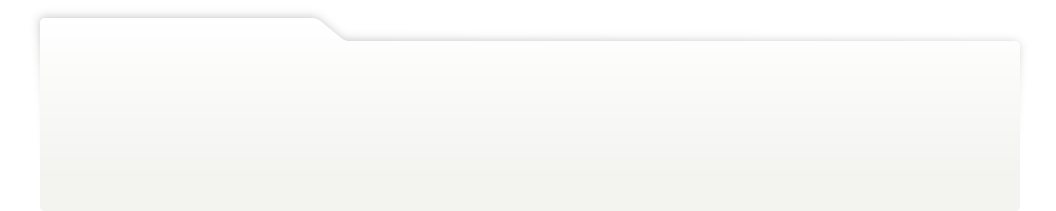
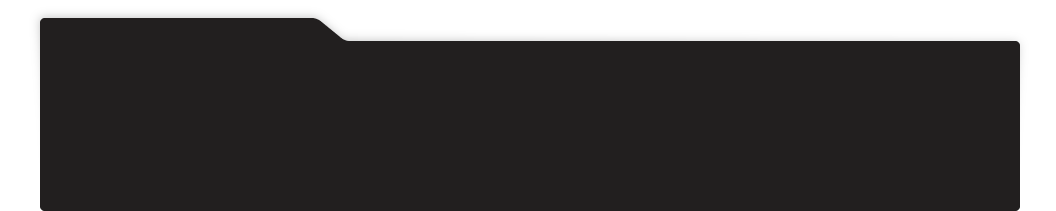
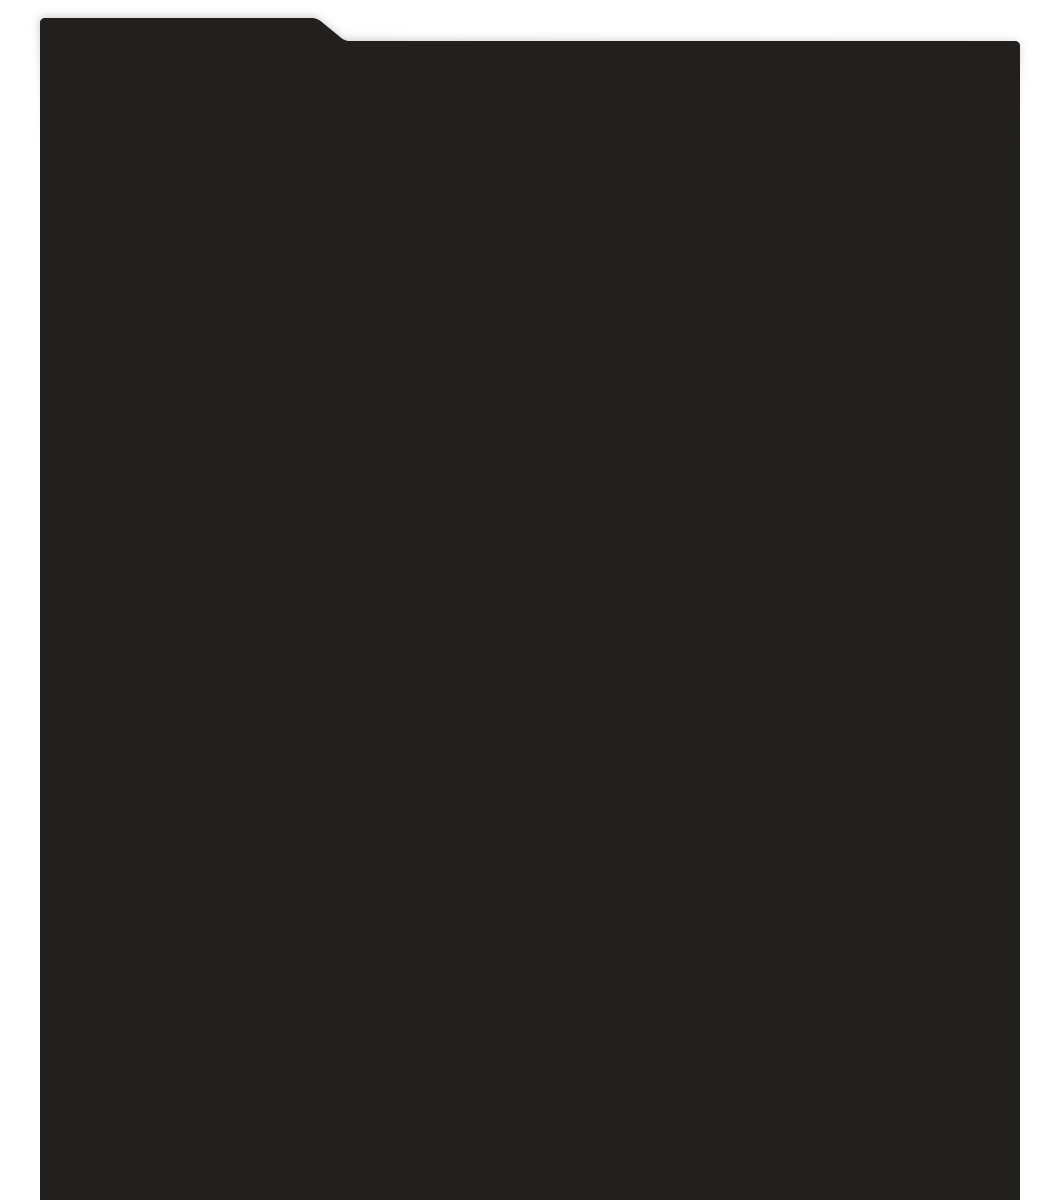
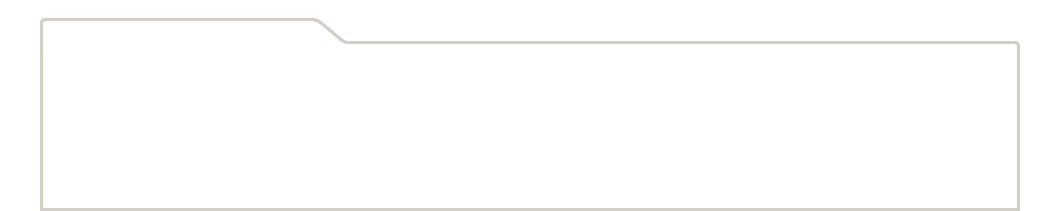
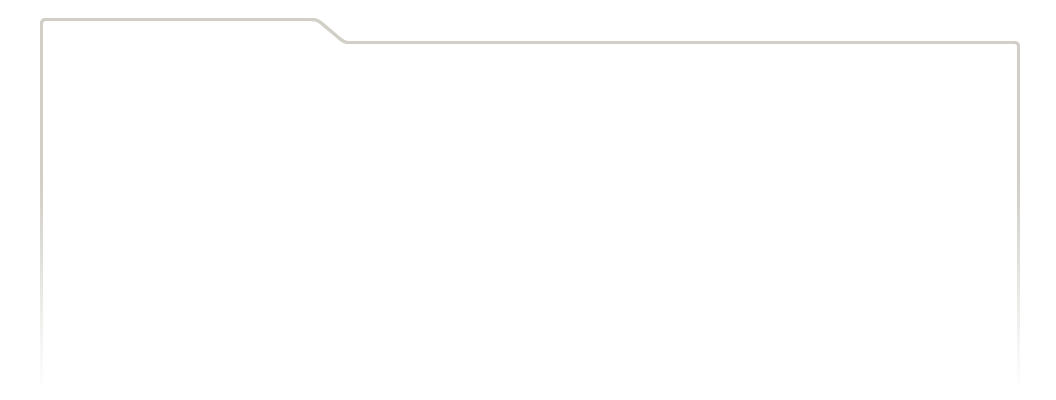
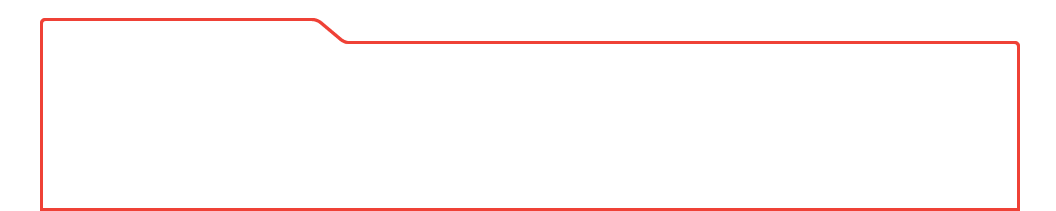
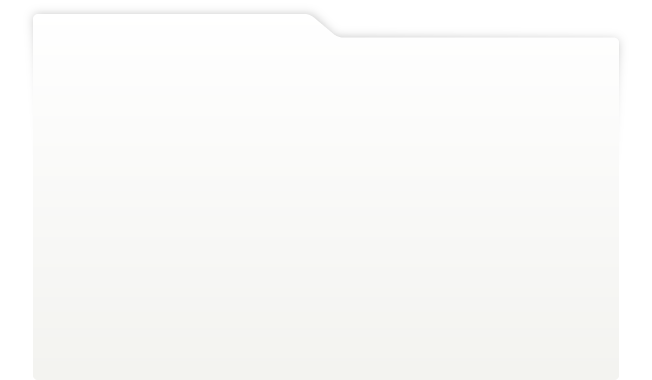
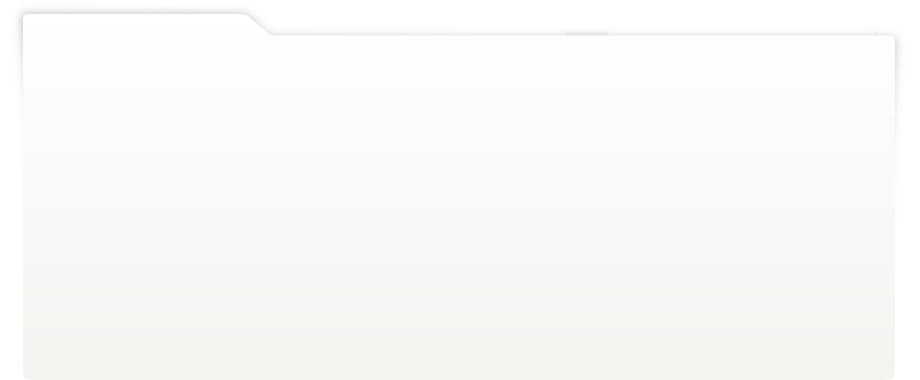
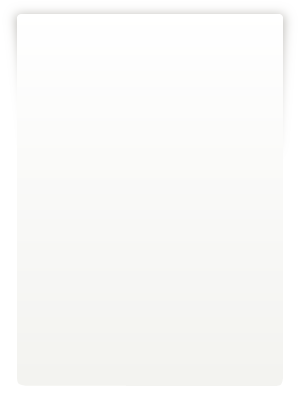
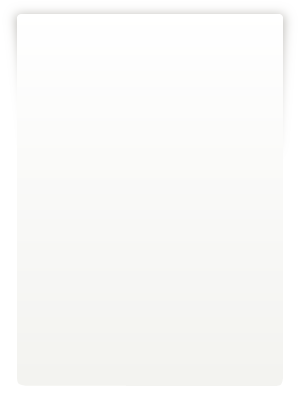
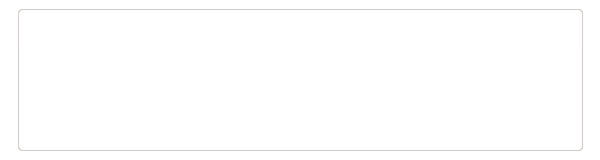
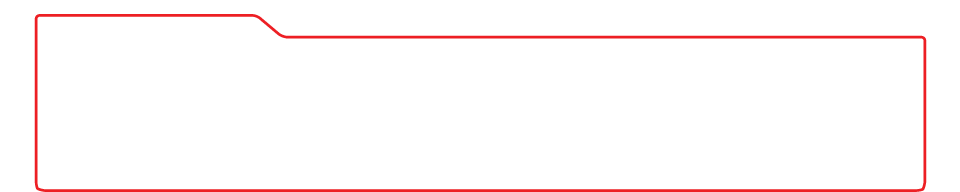
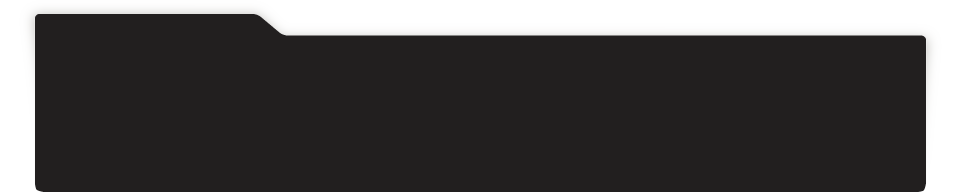
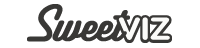
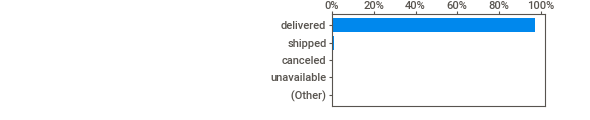
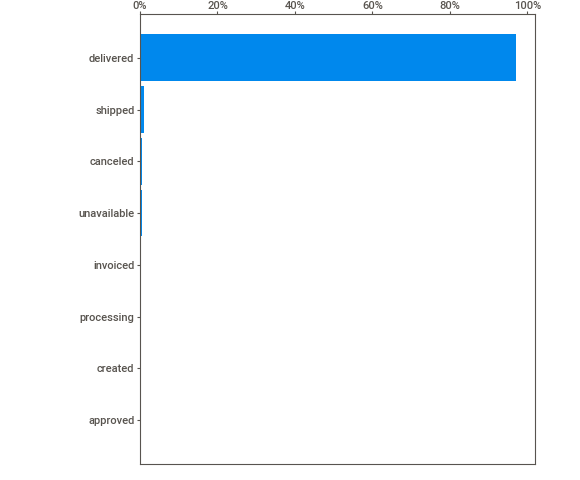
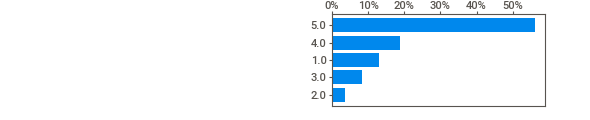
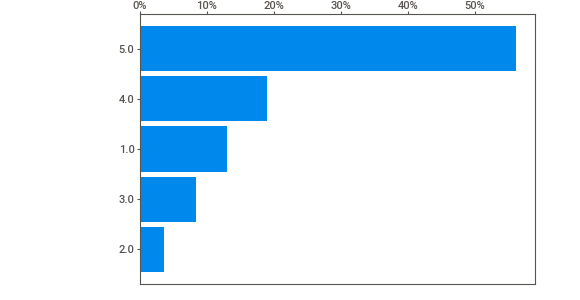
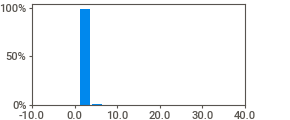
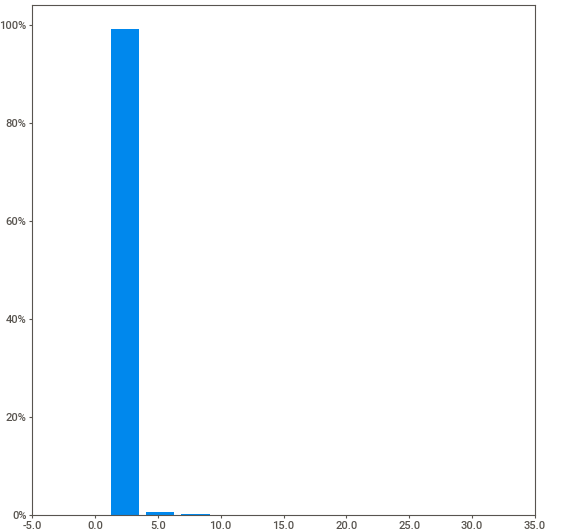
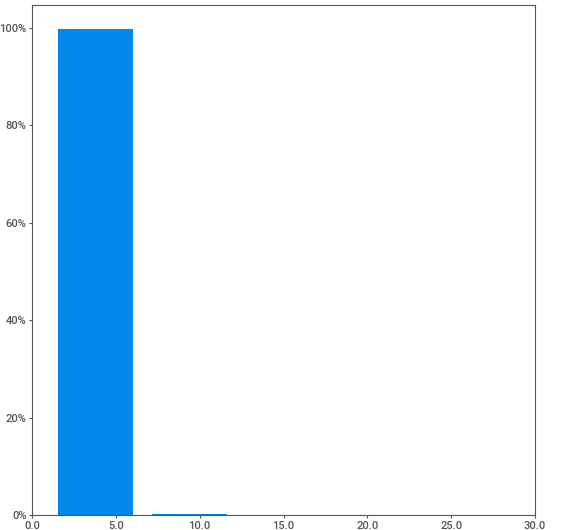
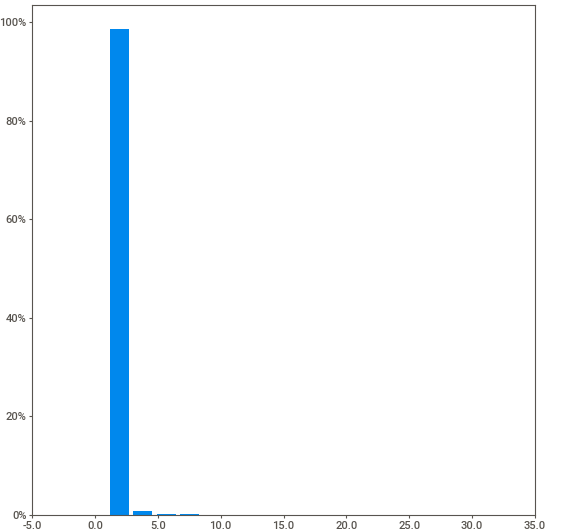
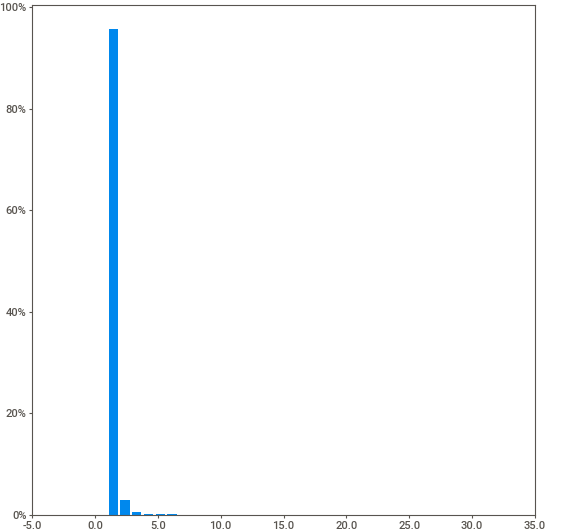
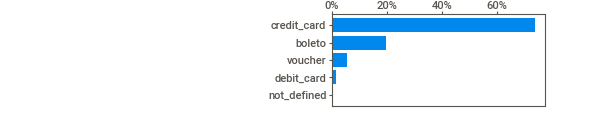
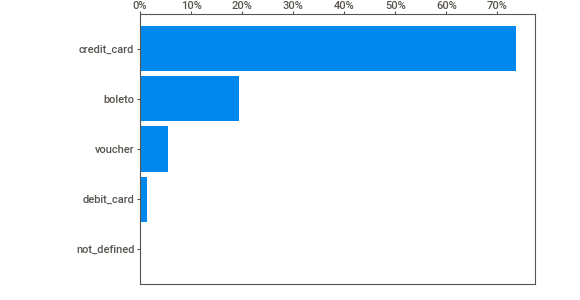
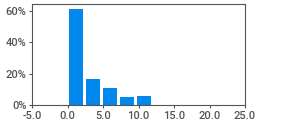
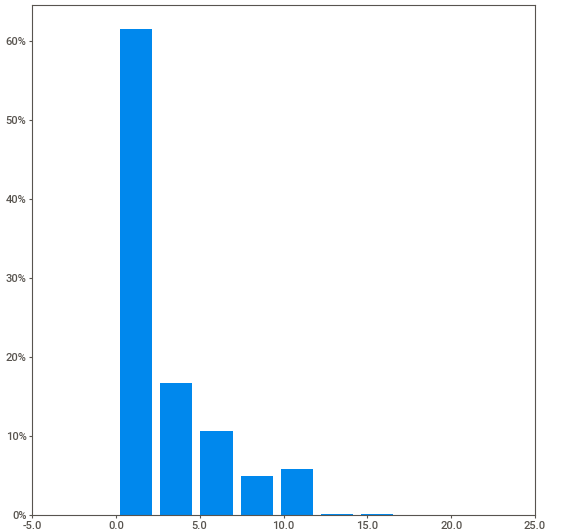
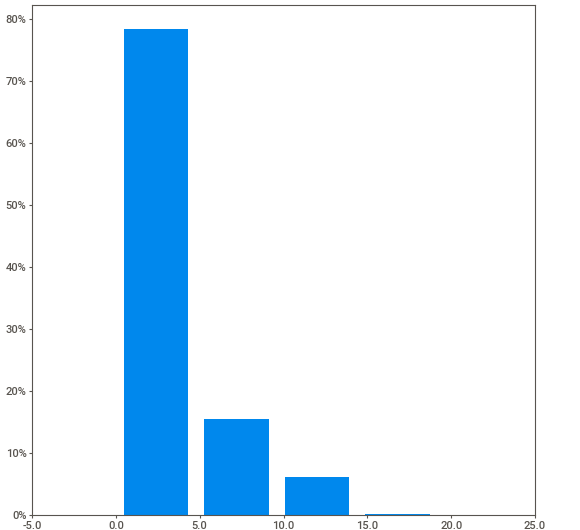
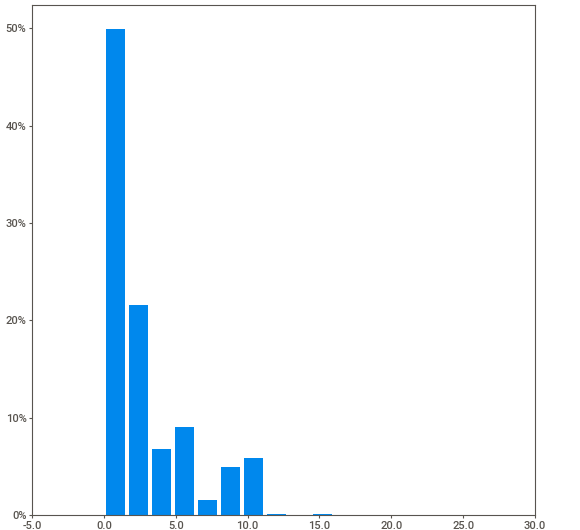
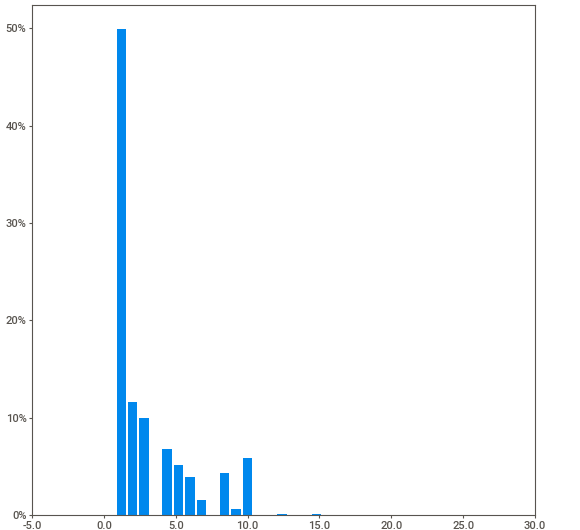
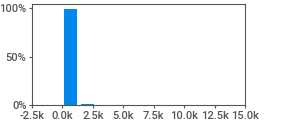
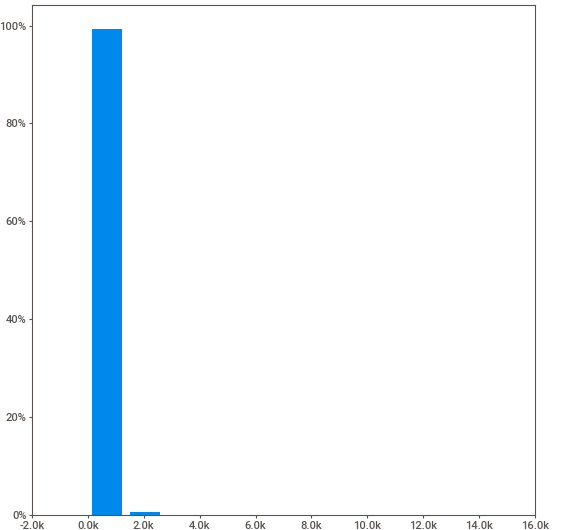
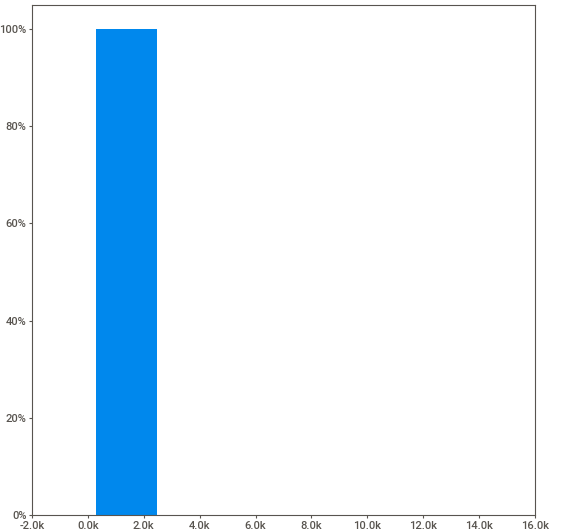
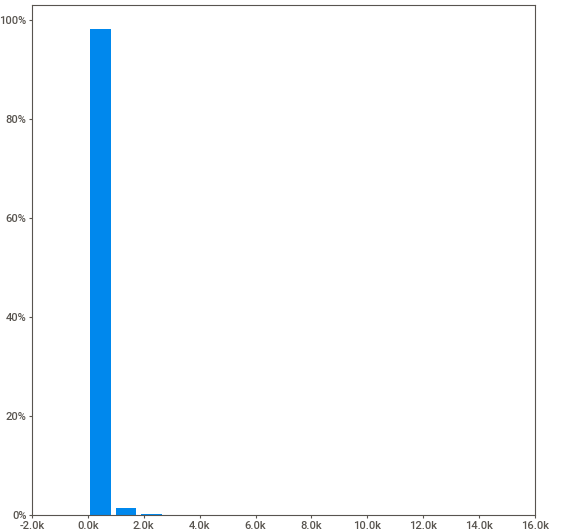
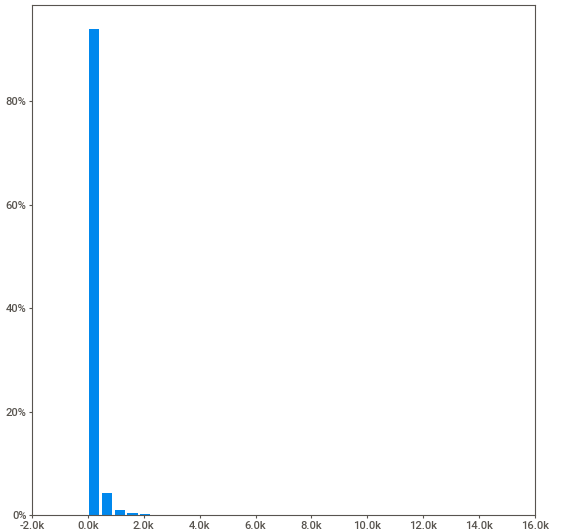
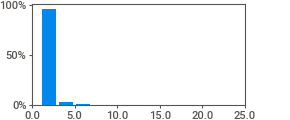
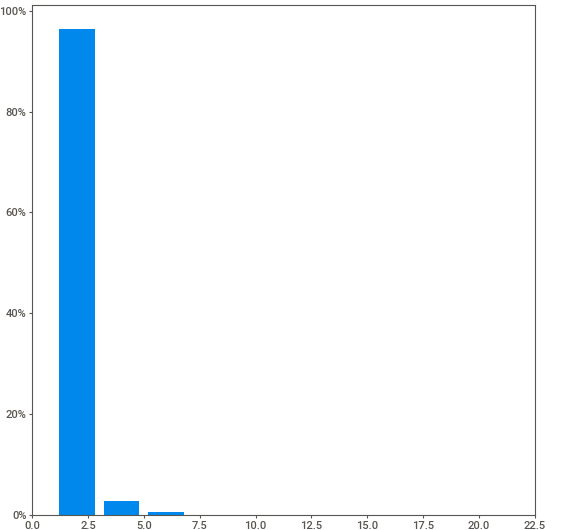
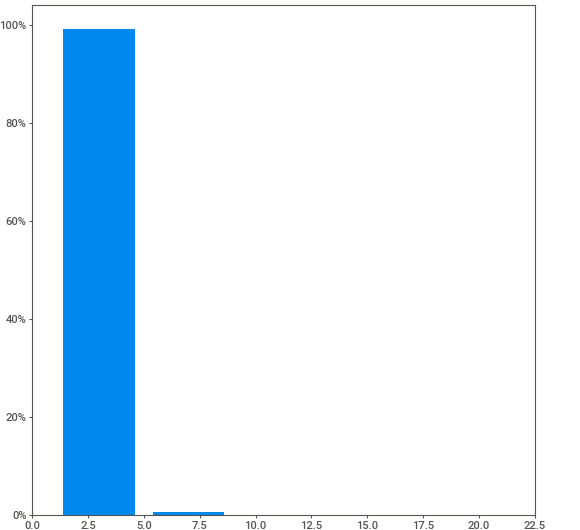
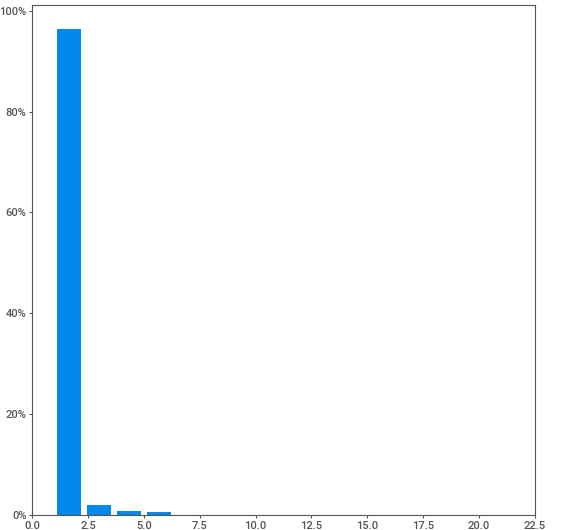
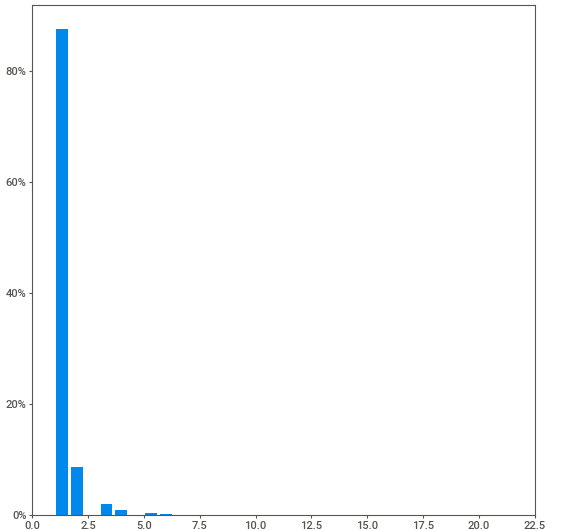
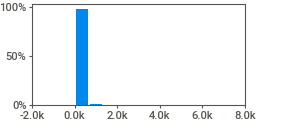
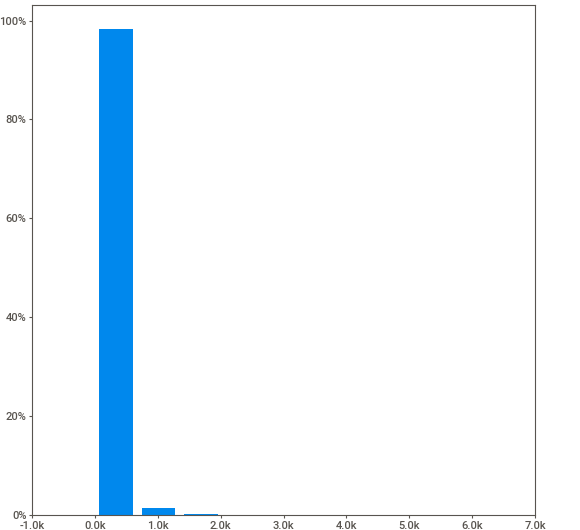
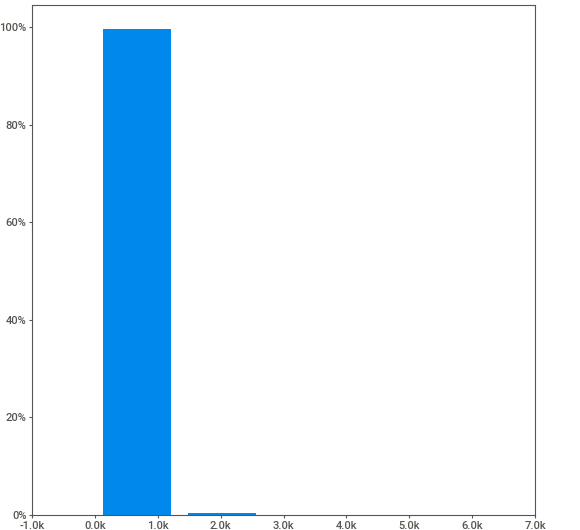
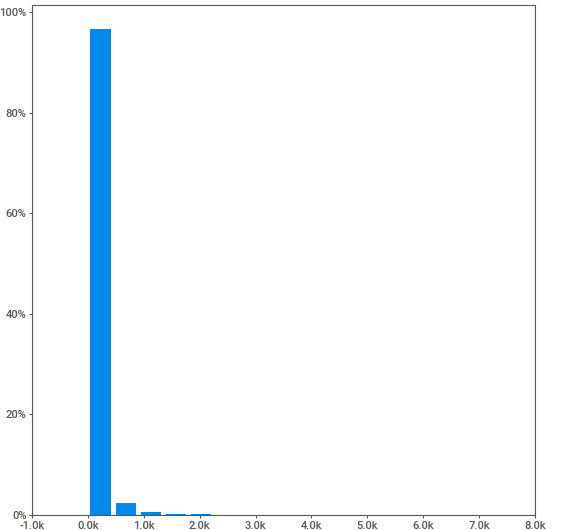
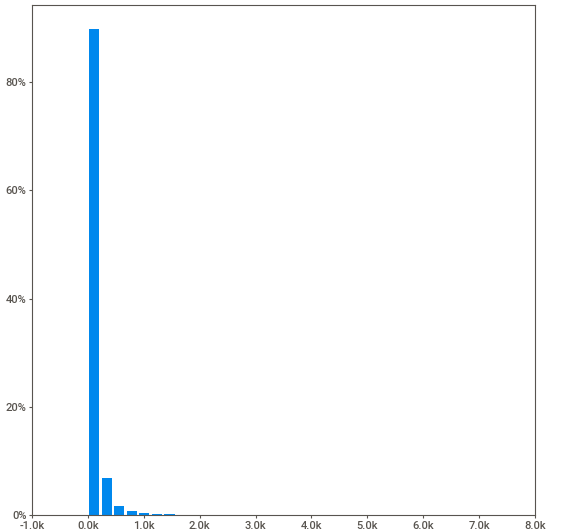
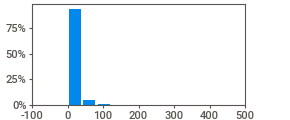
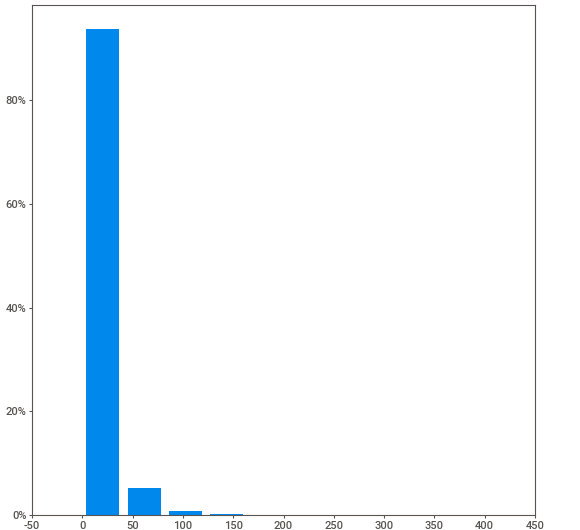
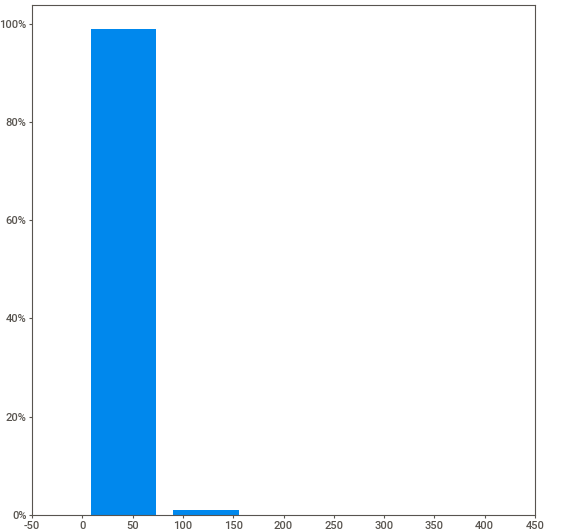
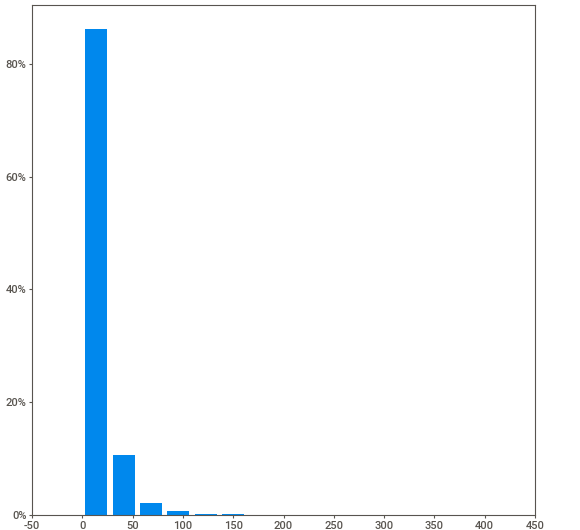
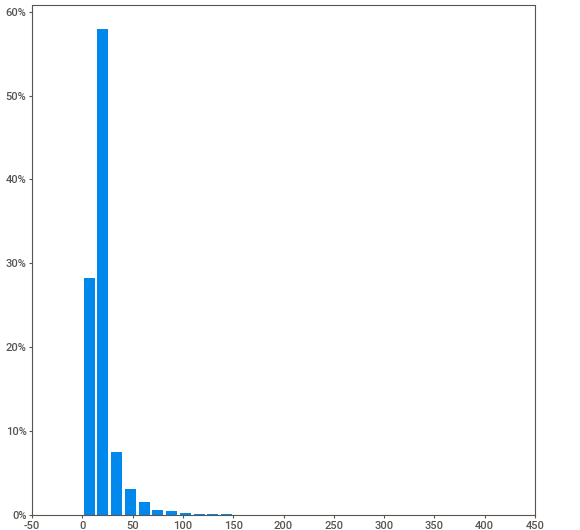
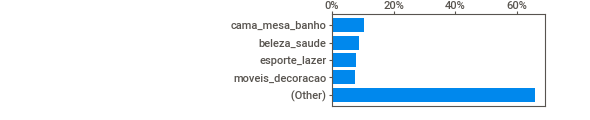
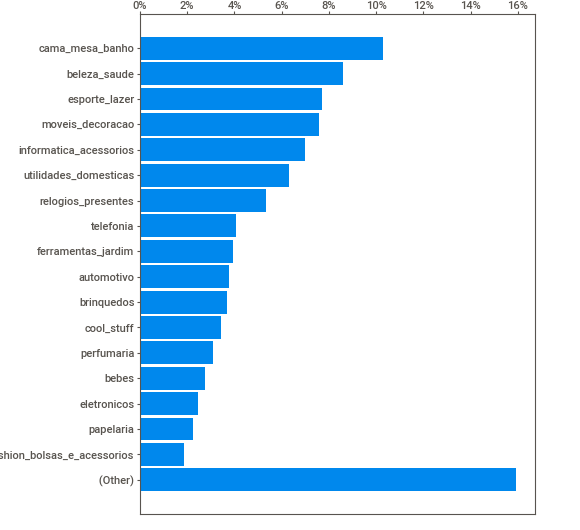
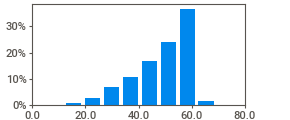
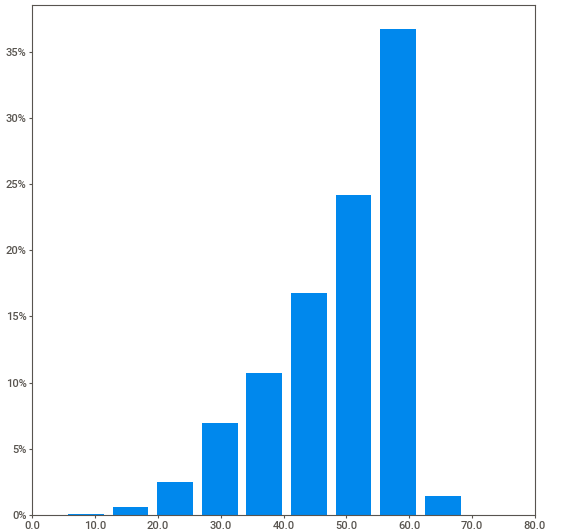
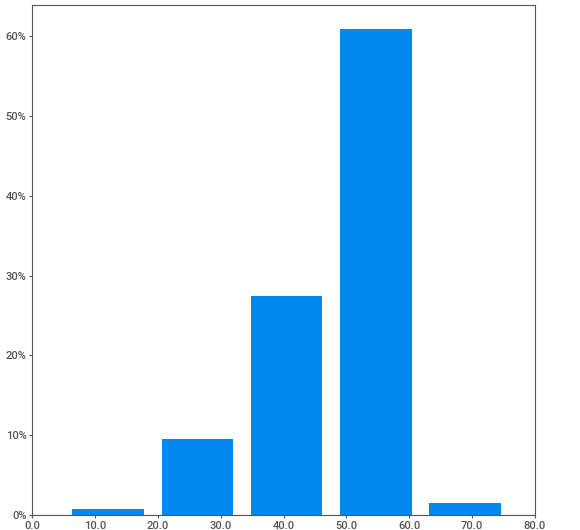
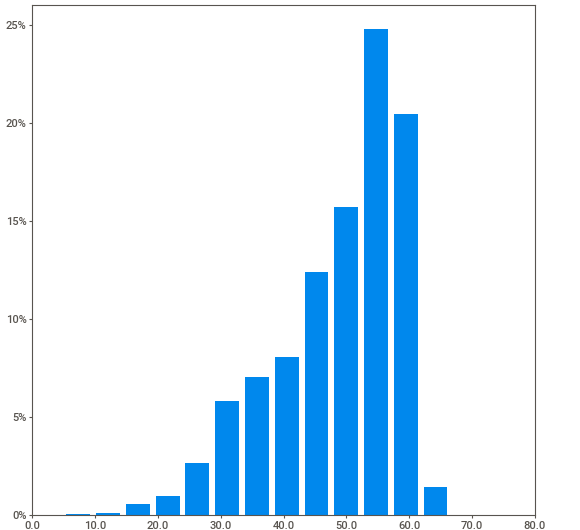
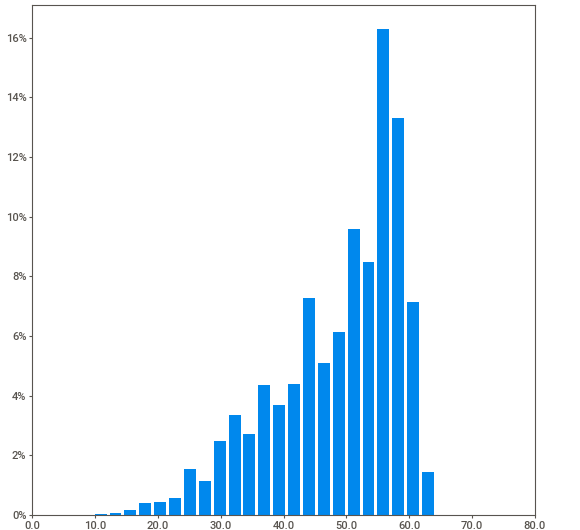
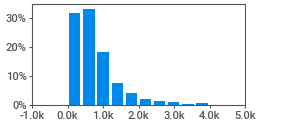
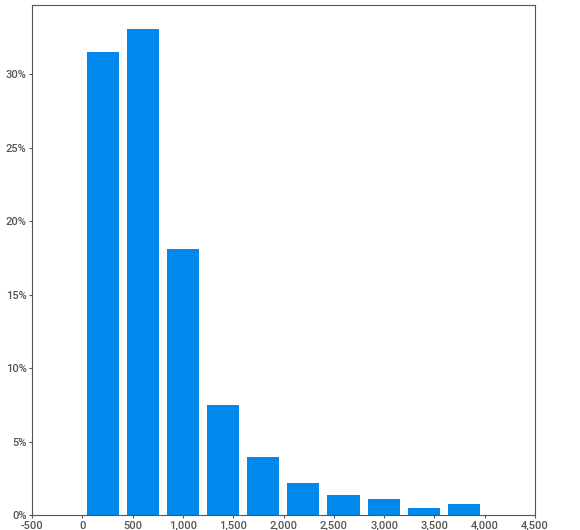
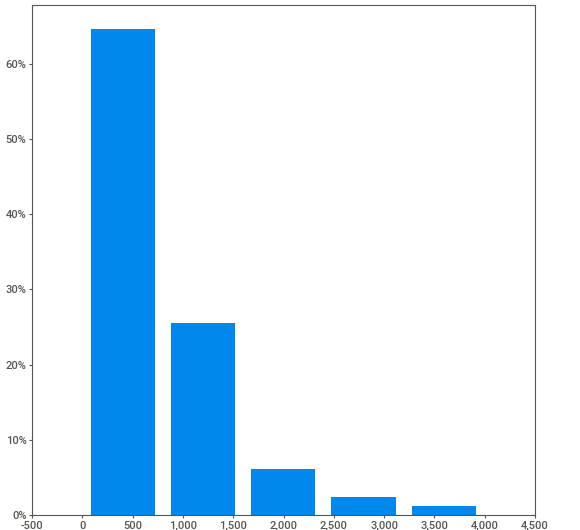
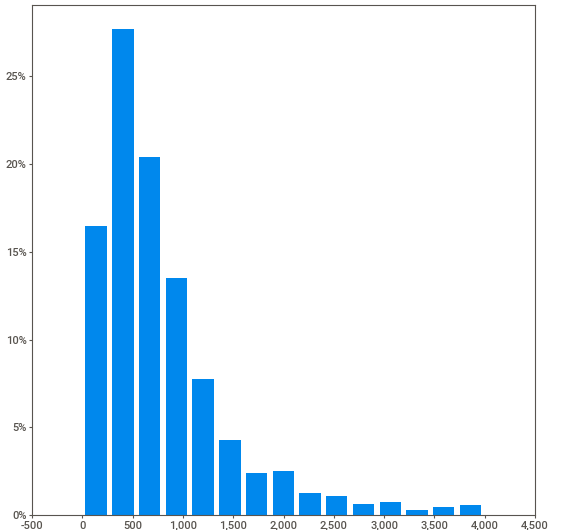
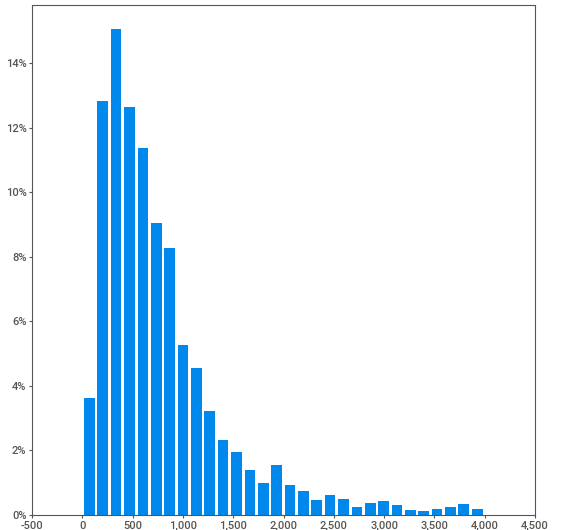
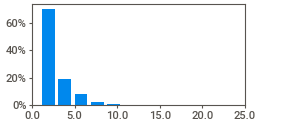
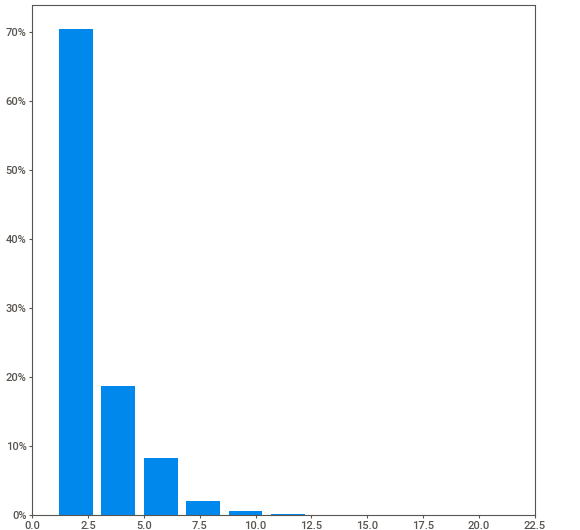
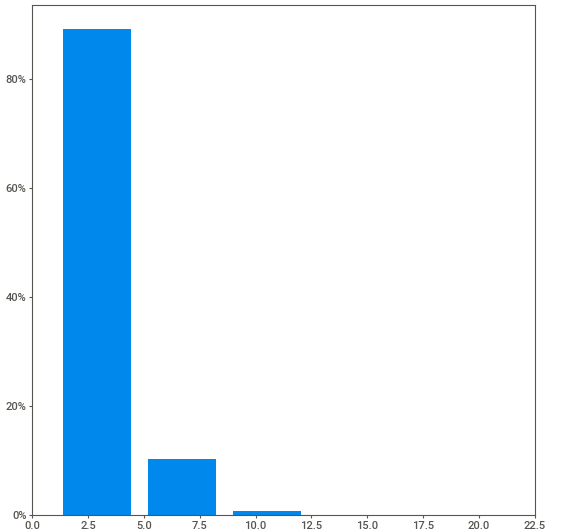
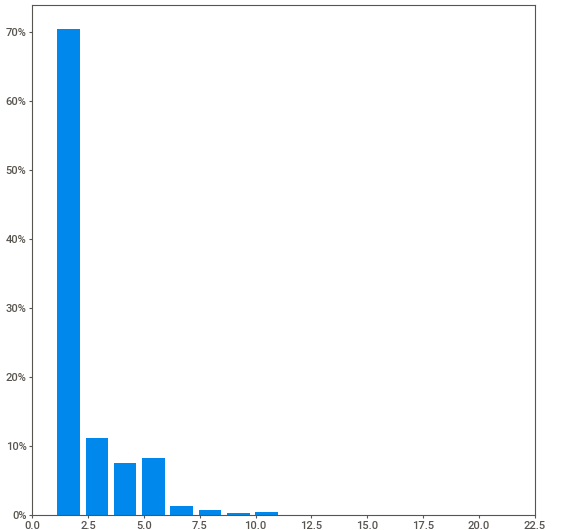
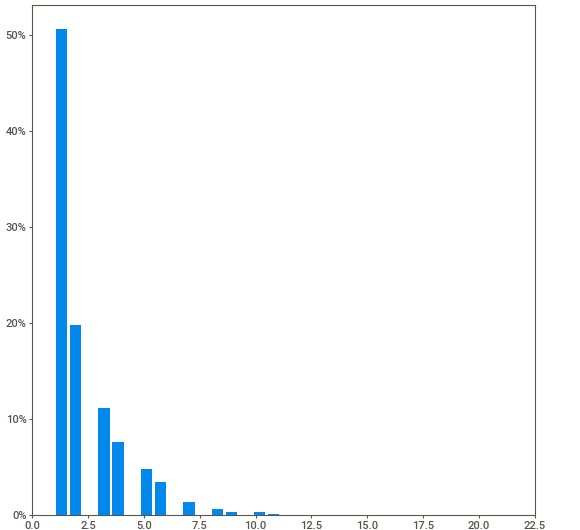
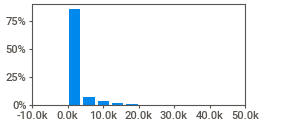
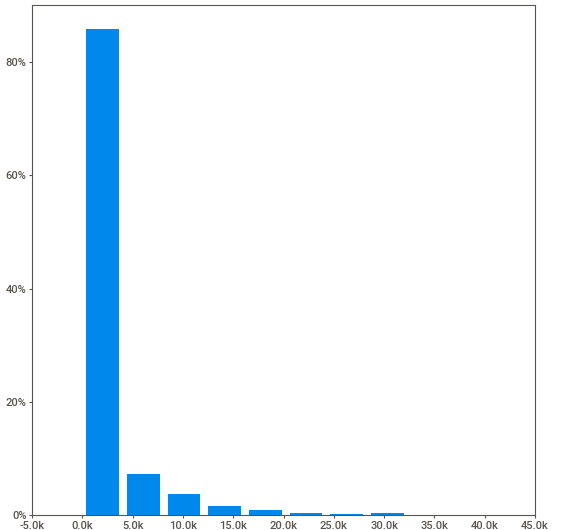
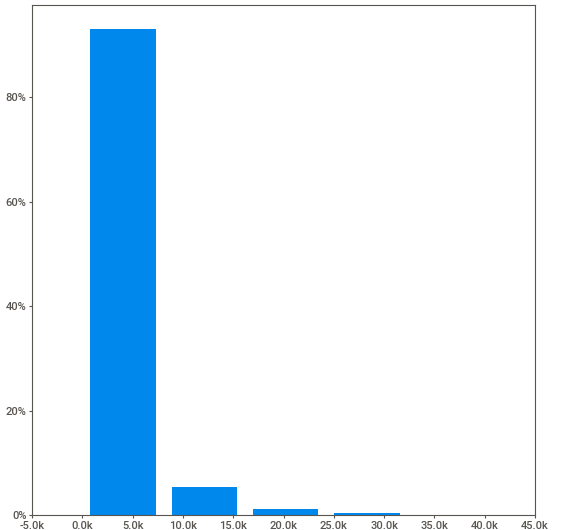
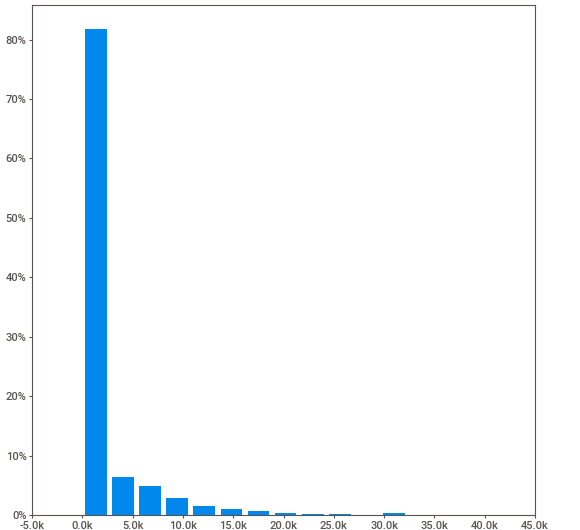
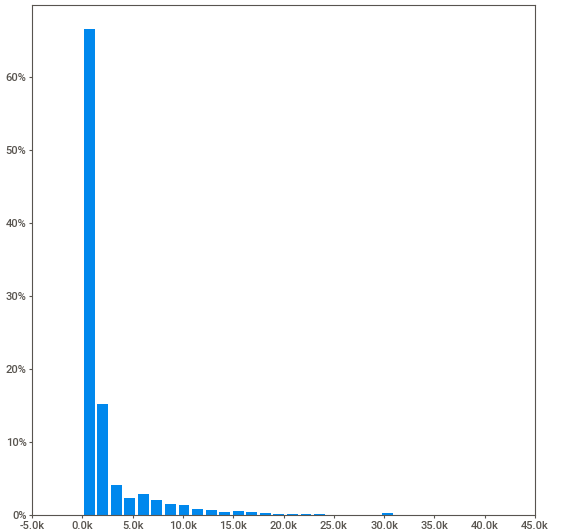
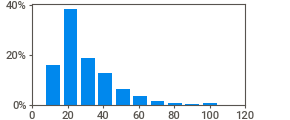
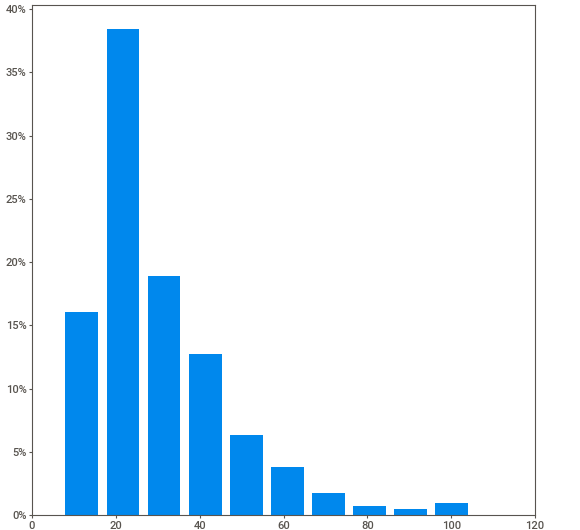
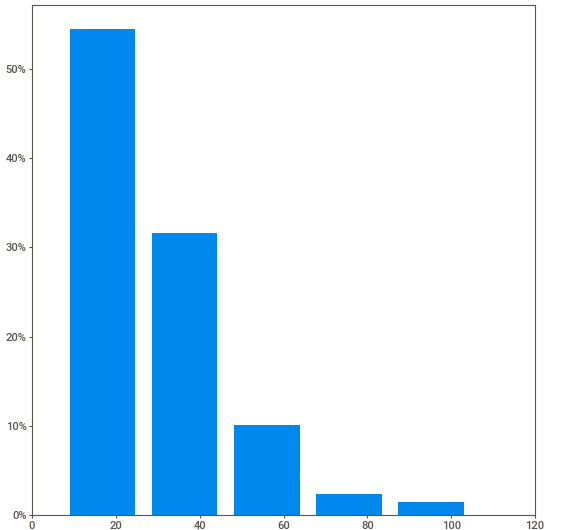
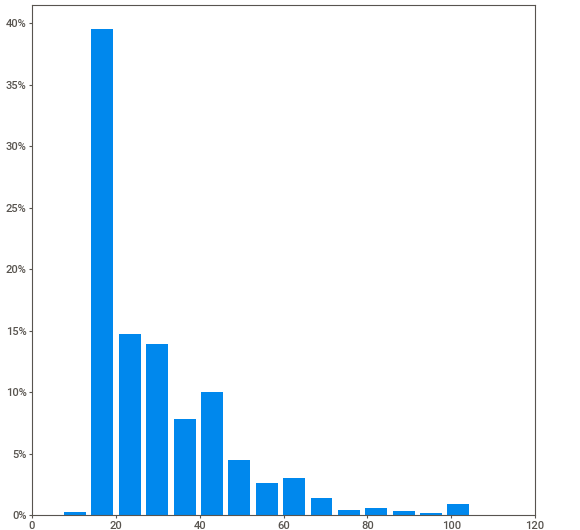
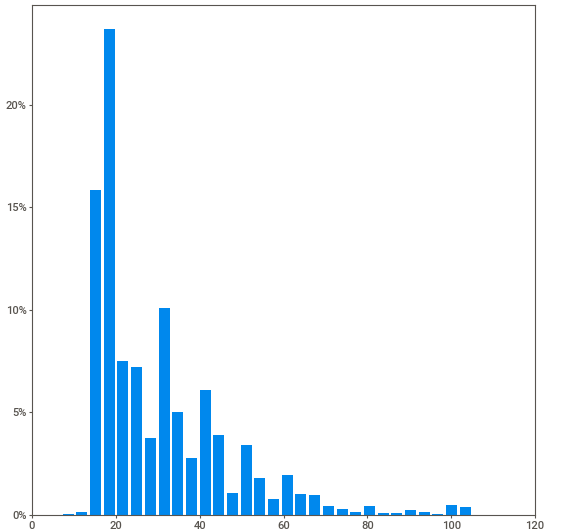
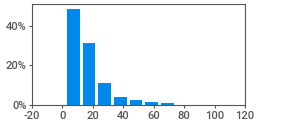
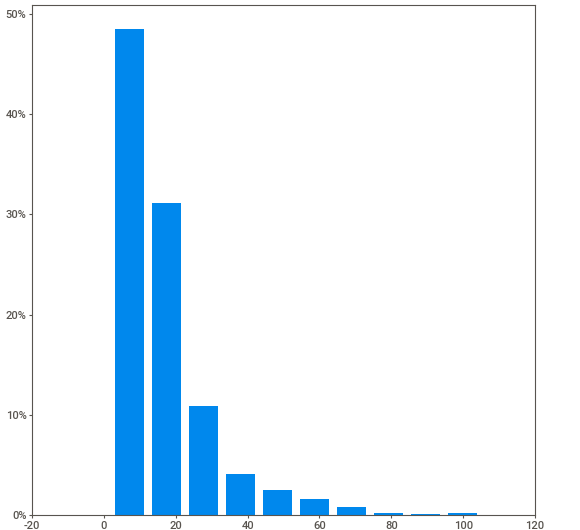
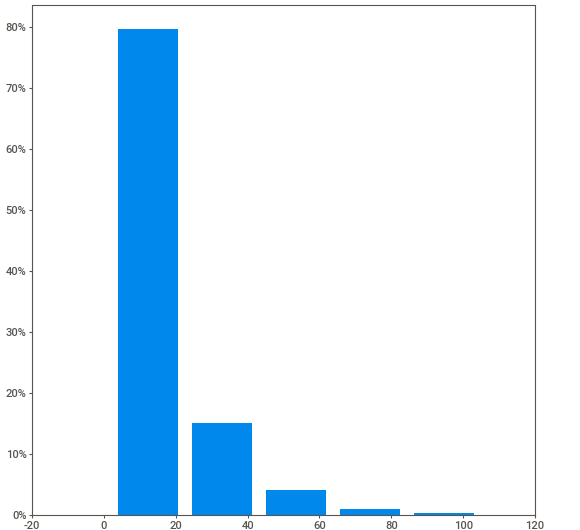
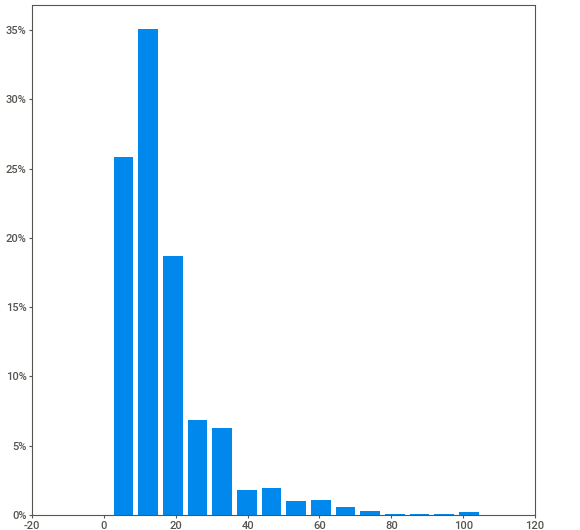
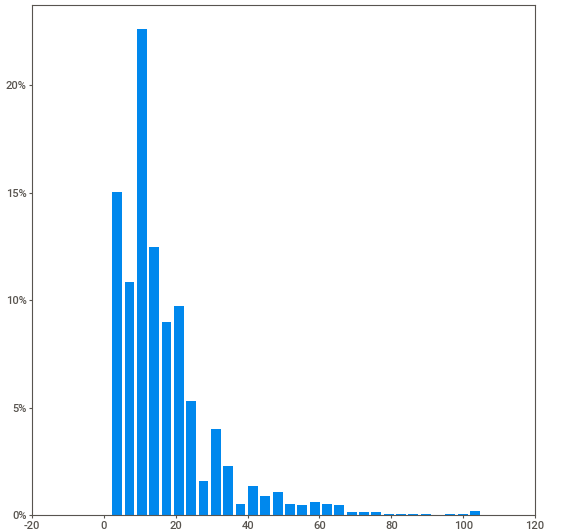
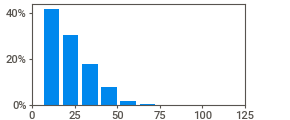
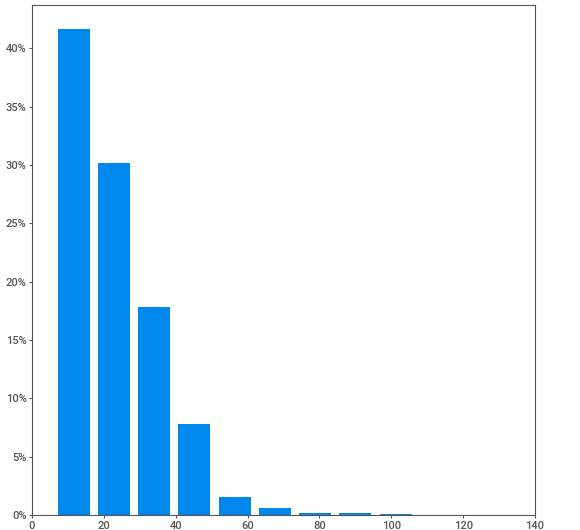
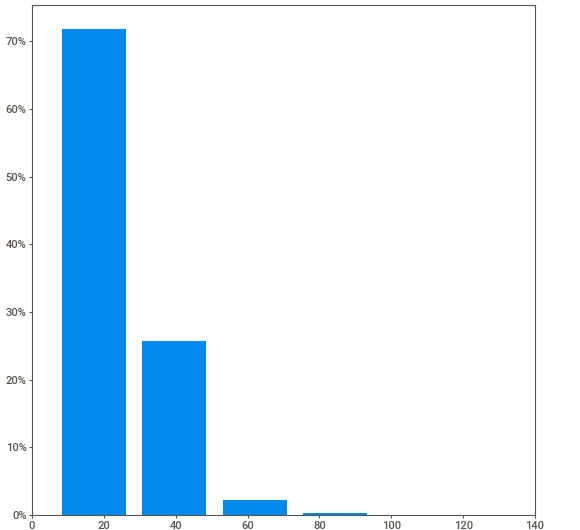
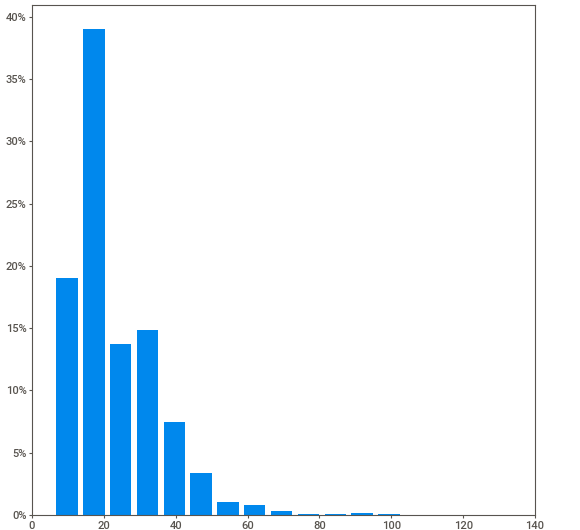
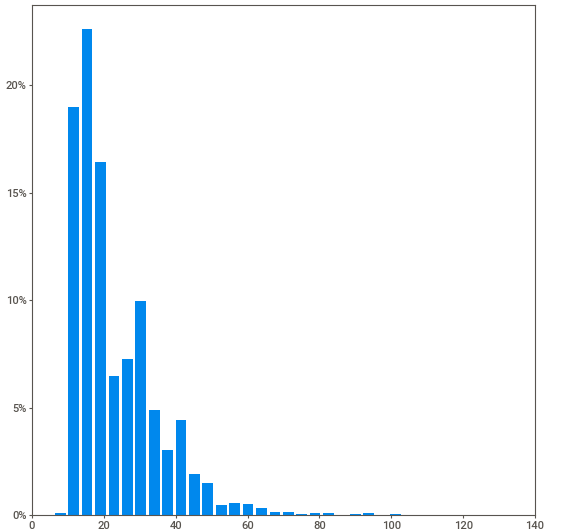
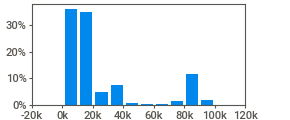
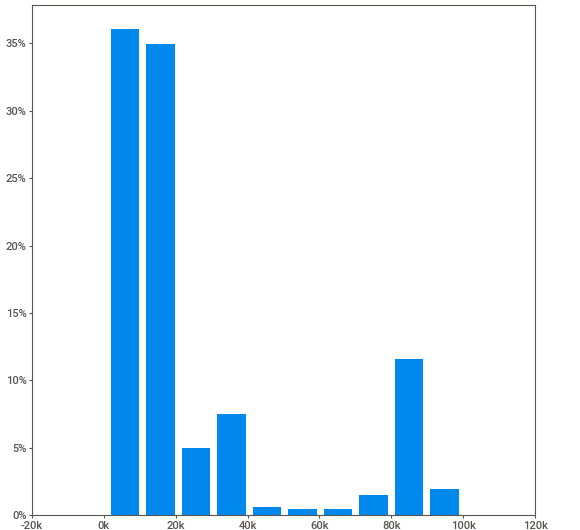
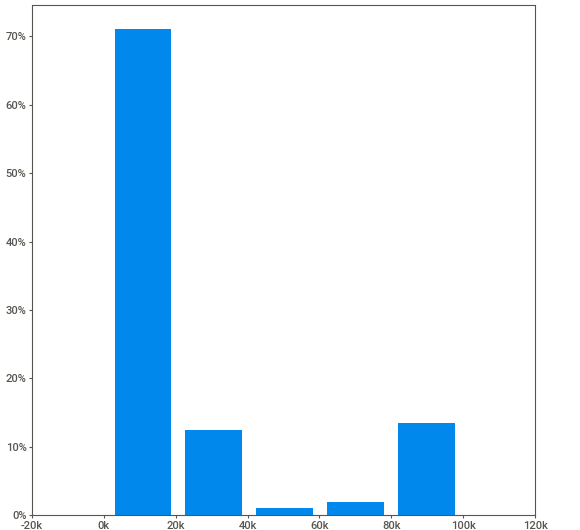
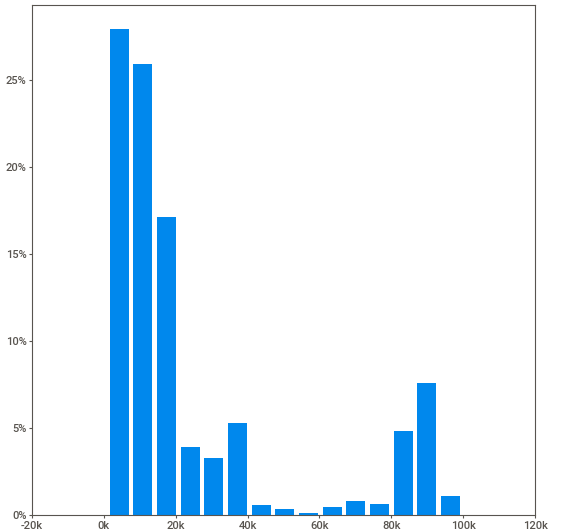
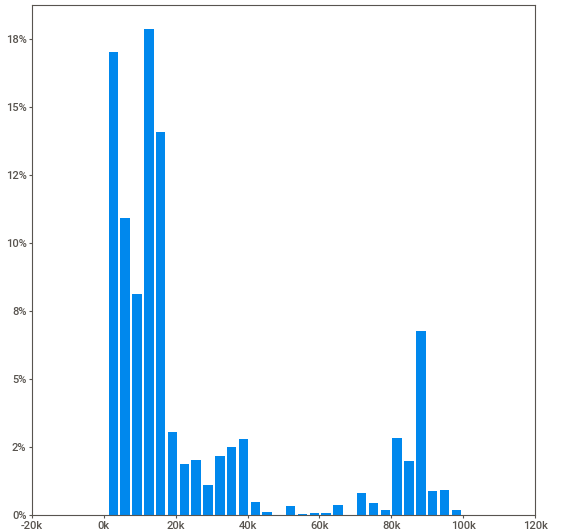
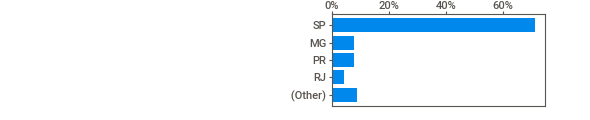
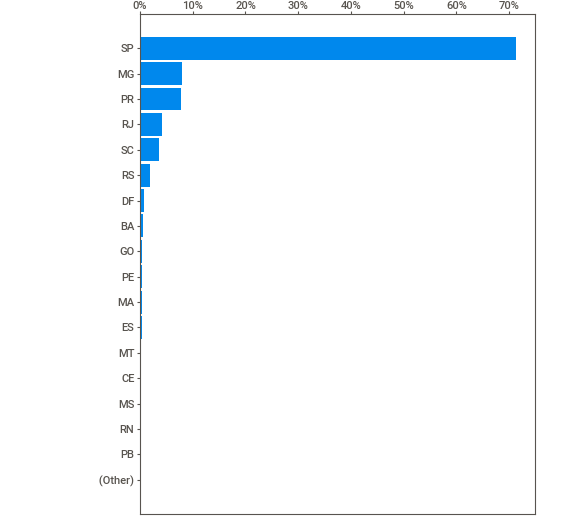
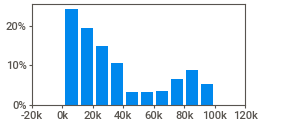
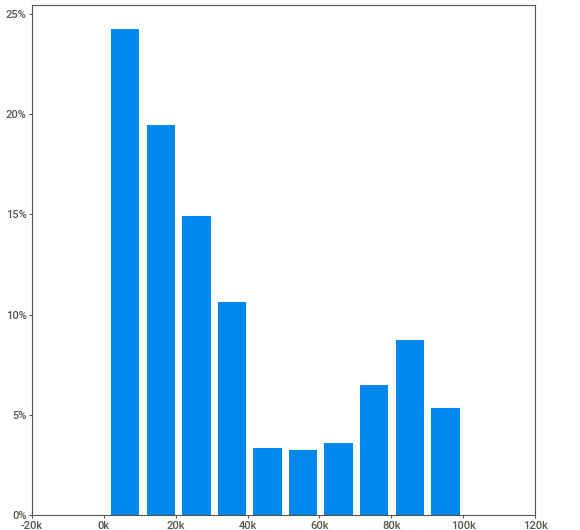
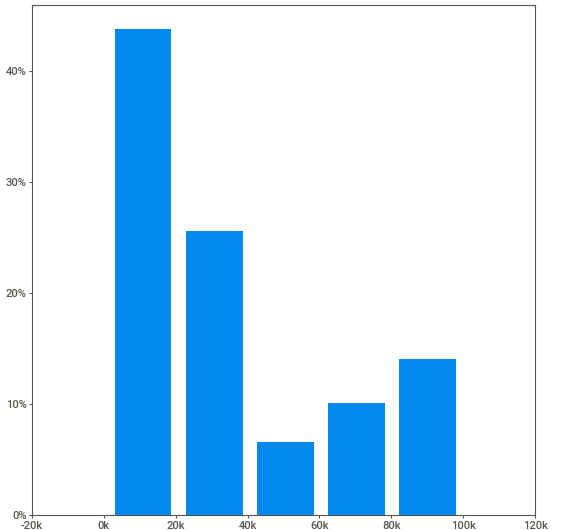
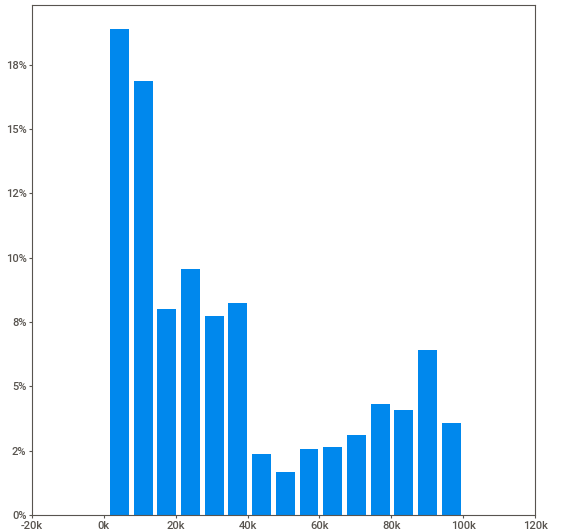
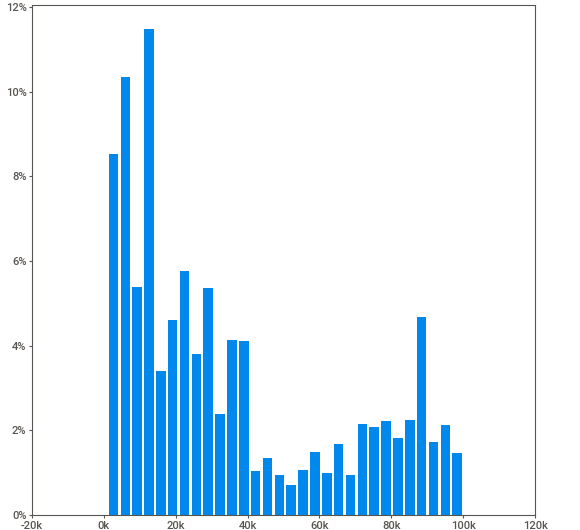
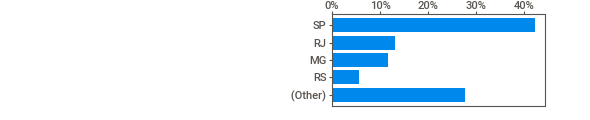
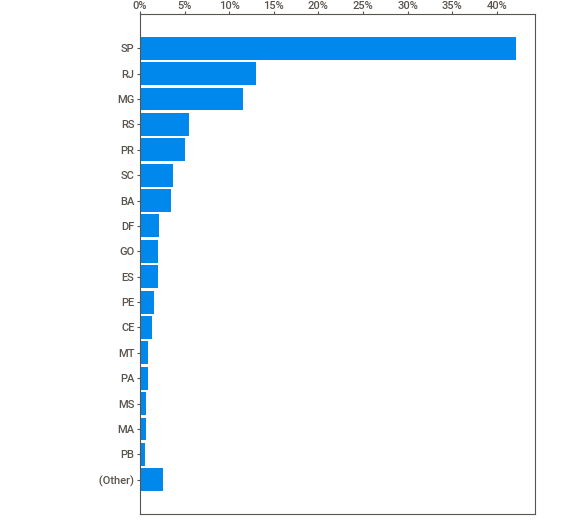
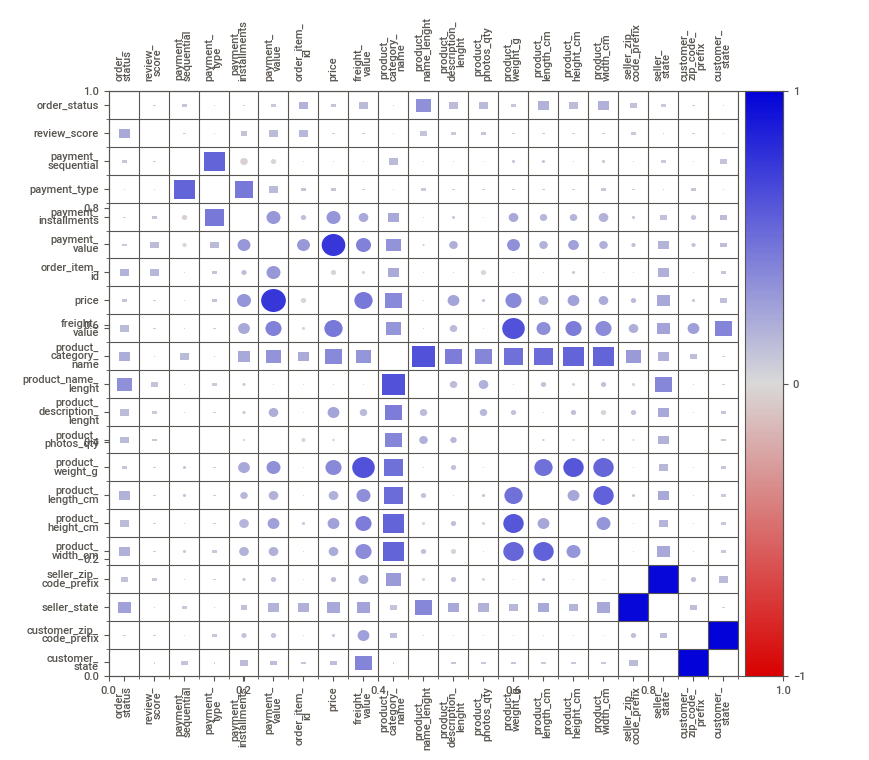
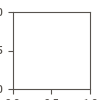

In [75]:
# EDA dashboard
analysis = sv.analyze(df)
analysis.show_notebook()

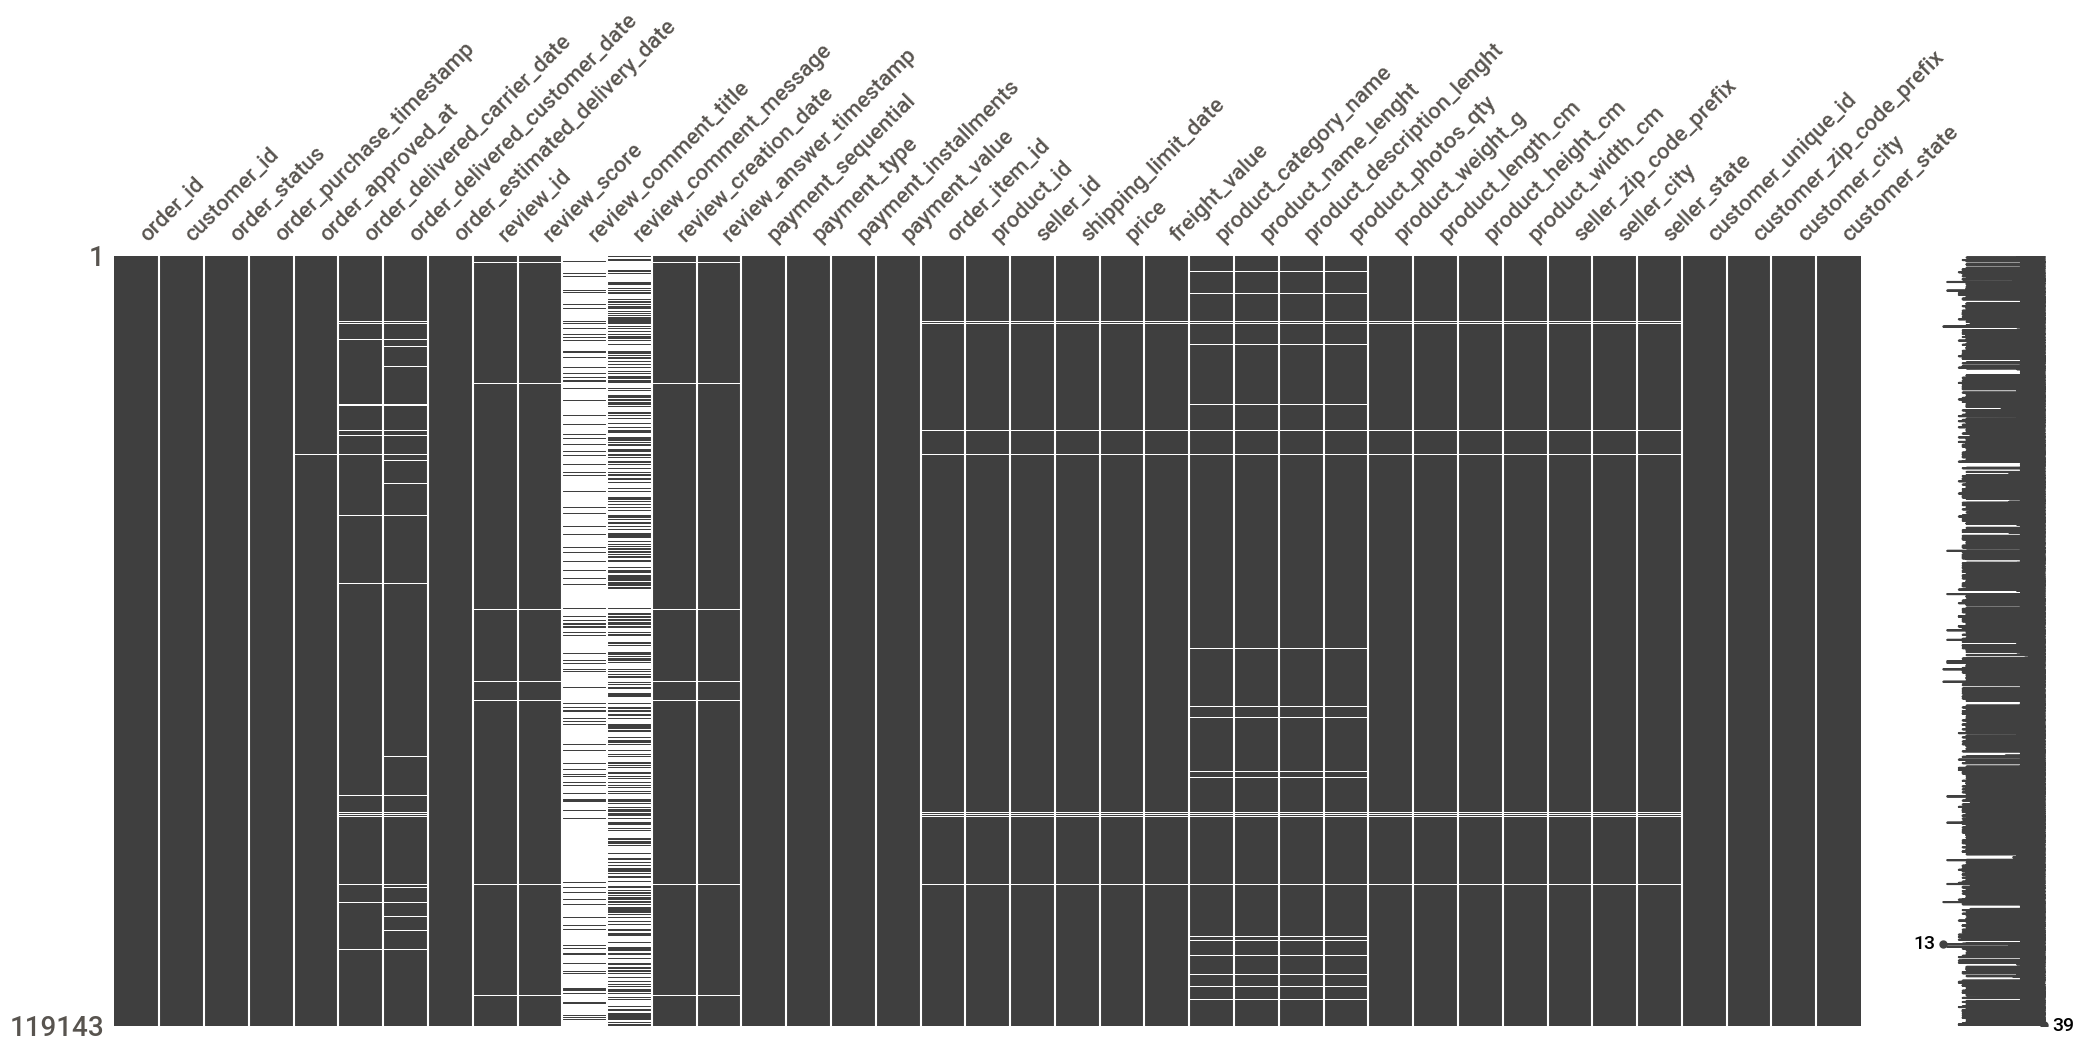

In [76]:
# Data missing patterns
missingno.matrix(df)
plt.show()

In [77]:
# Exporting merged dataframe
df.to_parquet(f'{DATA_PATH}/raw.parquet', index=False)